<a href="https://colab.research.google.com/github/freddy-7/TI3002C/blob/main/5_Extracci%C3%B3n_de_Caracter%C3%ADsticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importamos las librerias pandas, numpy y matplotlib respectivamente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Cargar archivo csv desde equipo
from google.colab import files
files.upload()

In [ ]:
%pip install openpyxl

In [30]:
#Carga desde un archivo .xlsx sin indice
Micro_Retailer= pd.read_excel('microretailer_mit_lift_lab.xlsx') 

In [4]:
#Verificamos información del DataFrame
Micro_Retailer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Columns: 106 entries, _record_id to 235_email
dtypes: float64(23), int64(2), object(81)
memory usage: 141.7+ KB


In [3]:
#Imprimo los primeros 5 registro del dataframe
Micro_Retailer.head()

,_record_id,_title,_server_updated_at,_updated_by,_geometry,_latitude,_longitude,228_store_name,229_store_picture,232_type_of_store,...,261_technology_organization,262_technology_serve_customers,263_technology_secure_sales,264_technology_budget,267_technology_investment_customer_preferences,234_willingness_participate_workshop,318_shopkeeper_name,319_shopkeepers_last_name,236_whatsapp,235_email
0,dff2998e-af74-4de6-8efd-488aca24e67b,"November 12, 2022",2022-11-12 22:15:10 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.233822273 19.0535362706),19.053536,-98.233822,Eugene’s Compostura,1 Photo,Tailor,...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
1,c596412f-4fc2-4983-acba-d9565859e42f,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2341421351 19.0535610353),19.053561,-98.234142,Frutas y verduras Angy,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
2,5bb632b3-41b5-4fb6-a817-b564e8b45a48,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.232299887 19.058654656),19.058655,-98.232300,Libélula,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
3,6774a0f6-bab4-4a58-bf94-95ad0b7cb438,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2331576513 19.0592929035),19.059293,-98.233158,Quality fix,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
4,6cc637fa-3d54-48c7-9499-6de13d0a26aa,"November 12, 2022",2022-11-12 22:15:08 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2338639604 19.0595846029),19.059585,-98.233864,Artesanías Los Pinos,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN


In [4]:
#Obtengo un análisis univariado de las variables categóricas
Tabla_freq = Micro_Retailer['214_customer_relationship_tools'].value_counts().reset_index()
Tabla_freq

,214_customer_relationship_tools,count
0,Redes sociales,27
1,Aplicación móvil,21
2,Ninguna,20
3,"Aplicación móvil,Redes sociales",13
4,Cuaderno,6
5,Teléfono,1
6,"Cuaderno,Redes sociales",1
7,"Aplicación móvil,De frente",1
8,Físico,1
9,"Aplicación móvil,Ninguna",1


In [5]:
#Obtengo un filtro de los valores más reelevantes de la variable categórica seleccionada
Filtro= Tabla_freq[Tabla_freq['count']>1]
Filtro

,214_customer_relationship_tools,count
0,Redes sociales,27
1,Aplicación móvil,21
2,Ninguna,20
3,"Aplicación móvil,Redes sociales",13
4,Cuaderno,6


In [6]:
#Ajusto el indice de mi dataframe
Filtro_index= Filtro.set_index('214_customer_relationship_tools')
Filtro_index

,count
214_customer_relationship_tools,
Redes sociales,27
Aplicación móvil,21
Ninguna,20
"Aplicación móvil,Redes sociales",13
Cuaderno,6


Text(0, 0.5, 'Frecuencia')

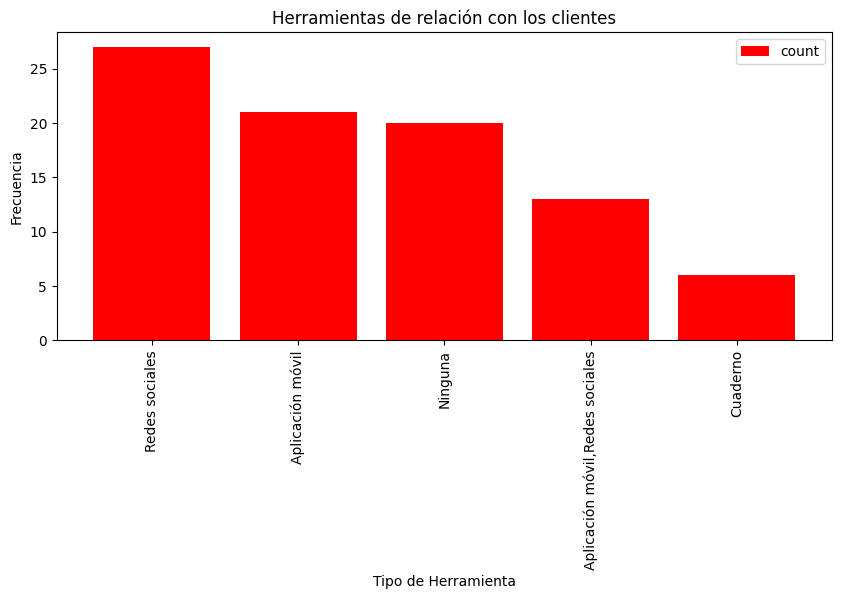

In [7]:
#Realizamos grafico de barras del dataframe filtrado
Filtro_index.plot(kind = 'bar', width=0.8, figsize=(10,4), color= "red")
plt.title('Herramientas de relación con los clientes')
plt.xlabel('Tipo de Herramienta')
plt.ylabel('Frecuencia')

<Axes: xlabel='214_customer_relationship_tools'>

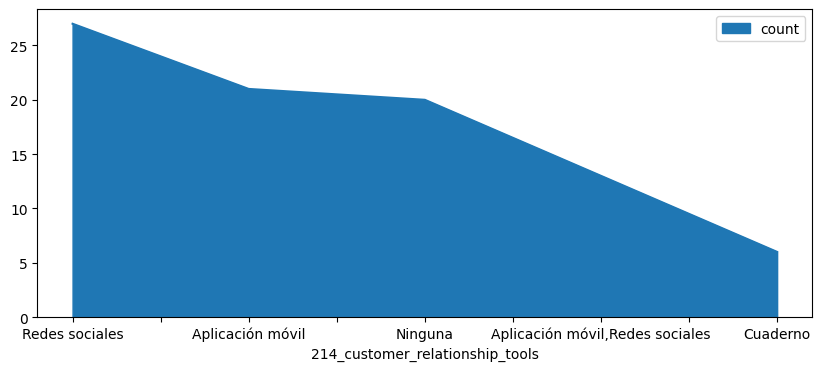

In [8]:
#Realizamos grafico de área del dataframe filtrado
Filtro_index.plot(kind='area', figsize=(10,4),alpha = 1)

<Axes: ylabel='count'>

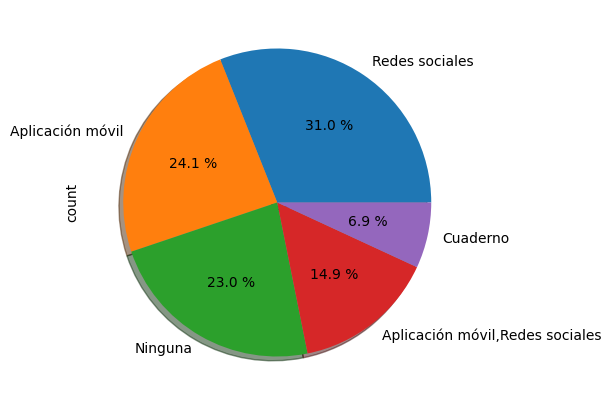

In [9]:
#Realizamos grafico de pastel del dataframe filtrado
Filtro_index["count"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

**Determinación de Clases para datos agrupados**


In [10]:
# Ajustar maximo de filas
pd.options.display.max_rows = None

In [11]:
#Corroboramos valores nulos
valores_nulos=Micro_Retailer.isnull().sum()
valores_nulos

_record_id                                                      0
_title                                                          0
_server_updated_at                                              0
_updated_by                                                     0
_geometry                                                       0
_latitude                                                       0
_longitude                                                      0
228_store_name                                                  0
229_store_picture                                               0
232_type_of_store                                               0
108_does_the_micro_retailer_has_a_barred_window_                0
99_does_the_micro_retailer_exhibits_products_outside_           0
102_does_the_micro_retailer_sells_fresh_products_               0
97_number_of_customers_in_store                                 0
268_number_fridges                                              3
184_store_

In [12]:
#Calculamos el numero total de la población "n"
Micro_Retailer['_latitude']. info()
n=171

<class 'pandas.core.series.Series'>
RangeIndex: 171 entries, 0 to 170
Series name: _latitude
Non-Null Count  Dtype  
--------------  -----  
171 non-null    float64
dtypes: float64(1)
memory usage: 1.5 KB


In [13]:
#Obtenemos el limite superior y el límite inferior de la columna objetivo
Max=Micro_Retailer['_latitude'].max()
Min=Micro_Retailer['_latitude'].min()
Limites= [Min, Max]
Limites

[np.float64(18.9993095), np.float64(19.0752733)]

In [14]:
#Calculamos el rango R
R=Max-Min
R

np.float64(0.07596380000000025)

In [15]:
#Calculamos el número de Intervalos de Clase "ni", aplicando la regla de Sturges
ni= 1+3.32*np.log10(n)
ni

np.float64(8.41354708650195)

In [16]:
#Calculamos el Ancho del Intervalo "i"
i=R/ni
i

np.float64(0.009028748424296662)

**Creación de Categorias a partir de clases**

In [31]:
#Categorización de variables
#Declaramos 8 intervalos 
#Ajustamos los limites para que todos los valores sean incluidos en los intervalos
#Ampliamos los límites en una unidad sobre los decimales menos significativos
#con la intención de incluir los valores que caigan justo en los límites
intervalos=np.linspace(18.98, 19.076, 9)
intervalos

array([18.98 , 18.992, 19.004, 19.016, 19.028, 19.04 , 19.052, 19.064,
       19.076])

In [32]:
#Creamos las categorías 
categorias= ["Categoría1 (18.98-18.992)", "Categoría2 (18.992-19.004)","Categoría3", "Categoría4",
             "Categoría5", "Categoría6","Categoría7", "Categoría8"]

In [33]:
#Finalmente creamos las categorías en la columna numérica
Micro_Retailer['_latitude']=pd.cut(x= Micro_Retailer['_latitude'], bins=intervalos, labels= categorias)
Micro_Retailer['_latitude']

0                      Categoría7
1                      Categoría7
2                      Categoría7
3                      Categoría7
4                      Categoría7
5                      Categoría7
6                      Categoría7
7                      Categoría7
8                      Categoría7
9                      Categoría7
10                     Categoría4
11                     Categoría4
12                     Categoría4
13                     Categoría4
14                     Categoría4
15                     Categoría4
16                     Categoría4
17                     Categoría4
18                     Categoría4
19                     Categoría4
20                     Categoría6
21                     Categoría8
22                     Categoría8
23                     Categoría7
24                     Categoría7
25                     Categoría7
26                     Categoría7
27                     Categoría7
28                     Categoría7
29            

In [34]:
#Obtengo un análisis univariado de las variables categóricas
Tabla_freq = Micro_Retailer['_latitude'].value_counts().reset_index()
Tabla_freq

,_latitude,count
0,Categoría8,47
1,Categoría4,45
2,Categoría6,31
3,Categoría7,29
4,Categoría5,10
5,Categoría3,7
6,Categoría2 (18.992-19.004),2
7,Categoría1 (18.98-18.992),0


In [35]:
#Obtengo un filtro de los valores más reelevantes de la variable categórica seleccionada
Filtro= Tabla_freq[Tabla_freq['count']>0]
Filtro

,_latitude,count
0,Categoría8,47
1,Categoría4,45
2,Categoría6,31
3,Categoría7,29
4,Categoría5,10
5,Categoría3,7
6,Categoría2 (18.992-19.004),2


In [36]:
#Ajusto el indice de mi dataframe
Filtro_index= Filtro.set_index('_latitude')
Filtro_index

,count
_latitude,
Categoría8,47
Categoría4,45
Categoría6,31
Categoría7,29
Categoría5,10
Categoría3,7
Categoría2 (18.992-19.004),2


Text(0, 0.5, 'Frecuencia')

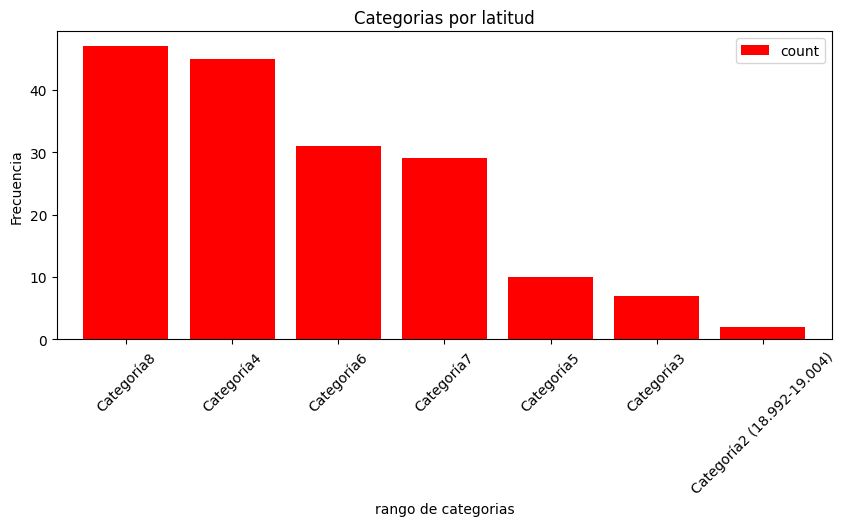

In [37]:
#Realizamos grafico de barras del dataframe filtrado
Filtro_index.plot(kind = 'bar', width=0.8, figsize=(10,4), color= "red", rot=45)
plt.title('Categorias por latitud')
plt.xlabel('rango de categorias')
plt.ylabel('Frecuencia')